# Priorieties based on Estimated Number of People Affected

In [35]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn import cross_validation
from sklearn.cross_validation import  cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import StringIO, pydotplus
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image  


Populating the interactive namespace from numpy and matplotlib


# Plan
    1. Load data 
        - Hayian overview prepared by Red Cross
    2. Predict number of houses damaged
       Algorithms:  
       a) Random Forest Regressor
       b) Gradient Boost Regressor
       
       
    3. Export prediction results




### Loading data

In [4]:
H = pd.read_csv("./data/Haiyan.csv")
H.index = H['M_Code']

### Exploration

In [5]:
H.columns

Index([u'Unnamed: 0', u'OBJECTID', u'ISO', u'P_Code', u'M_Code',
       u'Municipality', u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)', u'Rainfallme',
       u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)',
       u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
       u'OCHA CCCM', u'OCHA Education', u'OCHA Early Recovery & Livelyhoods',
       u'OCHA Food security and Agriculture', u'

In [6]:
H.describe().transpose()

/Users/Krysia/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,668.0,3.335000e+02,192.979273,0.000000,166.750000,333.500000,500.250000,6.670000e+02
OBJECTID,668.0,7.882395e+02,462.641127,3.000000,336.750000,753.500000,1154.250000,1.532000e+03
Area (km2),668.0,1.626053e+02,187.929418,7.124600,63.571575,113.206050,199.385825,2.378325e+03
Avg. Elevation (m),668.0,1.724227e+02,143.400904,3.653769,68.862441,128.689500,243.922899,9.574721e+02
Perimeter (m),668.0,7.299853e+04,60550.456252,17587.515000,42570.188500,60143.054500,86427.579750,8.958719e+05
Coastline Length (m),668.0,1.708049e+04,24285.471310,0.000000,2262.692500,12186.740000,22275.352500,3.998398e+05
C/P Ratio,668.0,2.457186e-01,0.217020,0.000000,0.020000,0.230000,0.380000,1.000000e+00
"Distance to coastline (m, mean)",668.0,6.851020e+03,6159.965384,155.732039,2613.671997,4637.454876,9401.220724,3.821867e+04
"Distance to coastline (m, stdev)",668.0,3.000927e+03,1812.473031,121.528284,1681.028313,2657.599623,3848.262425,1.032078e+04
Ruggedness index (mean),668.0,3.867956e+01,19.994503,3.556218,24.167912,36.362904,50.988138,1.097074e+02


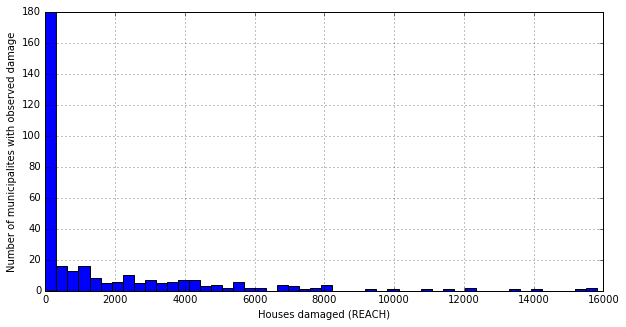

In [7]:
ax = H['Houses damaged (REACH)'].hist(bins=50, figsize=(10,5))
ax.set_ylabel("Number of municipalites with observed damage")
ax.set_xlabel("Houses damaged (REACH)")

/Users/Krysia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x111293190>],
 'caps': [<matplotlib.lines.Line2D at 0x1112a10d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1112ad3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1112a1d50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111293390>,
  <matplotlib.lines.Line2D at 0x111293a50>]}

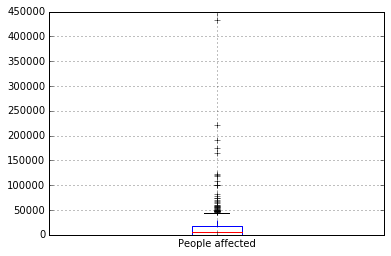

In [8]:
H[['People affected']].boxplot(figsize=(2,5))

In [86]:
H.columns

Index([u'Unnamed: 0', u'OBJECTID', u'ISO', u'P_Code', u'M_Code',
       u'Municipality', u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Poverty (%)', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)', u'Rainfallme',
       u'Surge Height int. (m)', u'Surge risk class (REACH)',
       u'People affected', u'People affected (% 2010)', u'Deaths',
       u'Houses damaged (REACH)', u'Houses damaged (% Shelter Cluster)',
       u'Emergency shelter (% planned & reached Shelter Cluster)',
       u'Support to Self Recovery (% planned & reached Shelter Cluster)',
       u'OCHA CCCM', u'OCHA Education', u'OCHA Early Recovery & Livelyhoods',
       u'OCHA Food security and Agriculture', u'

In [9]:
subH = H[[ u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', u'Area Flooded (%)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk class (REACH)', u'People affected']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dadf750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b183550>]], dtype=object)

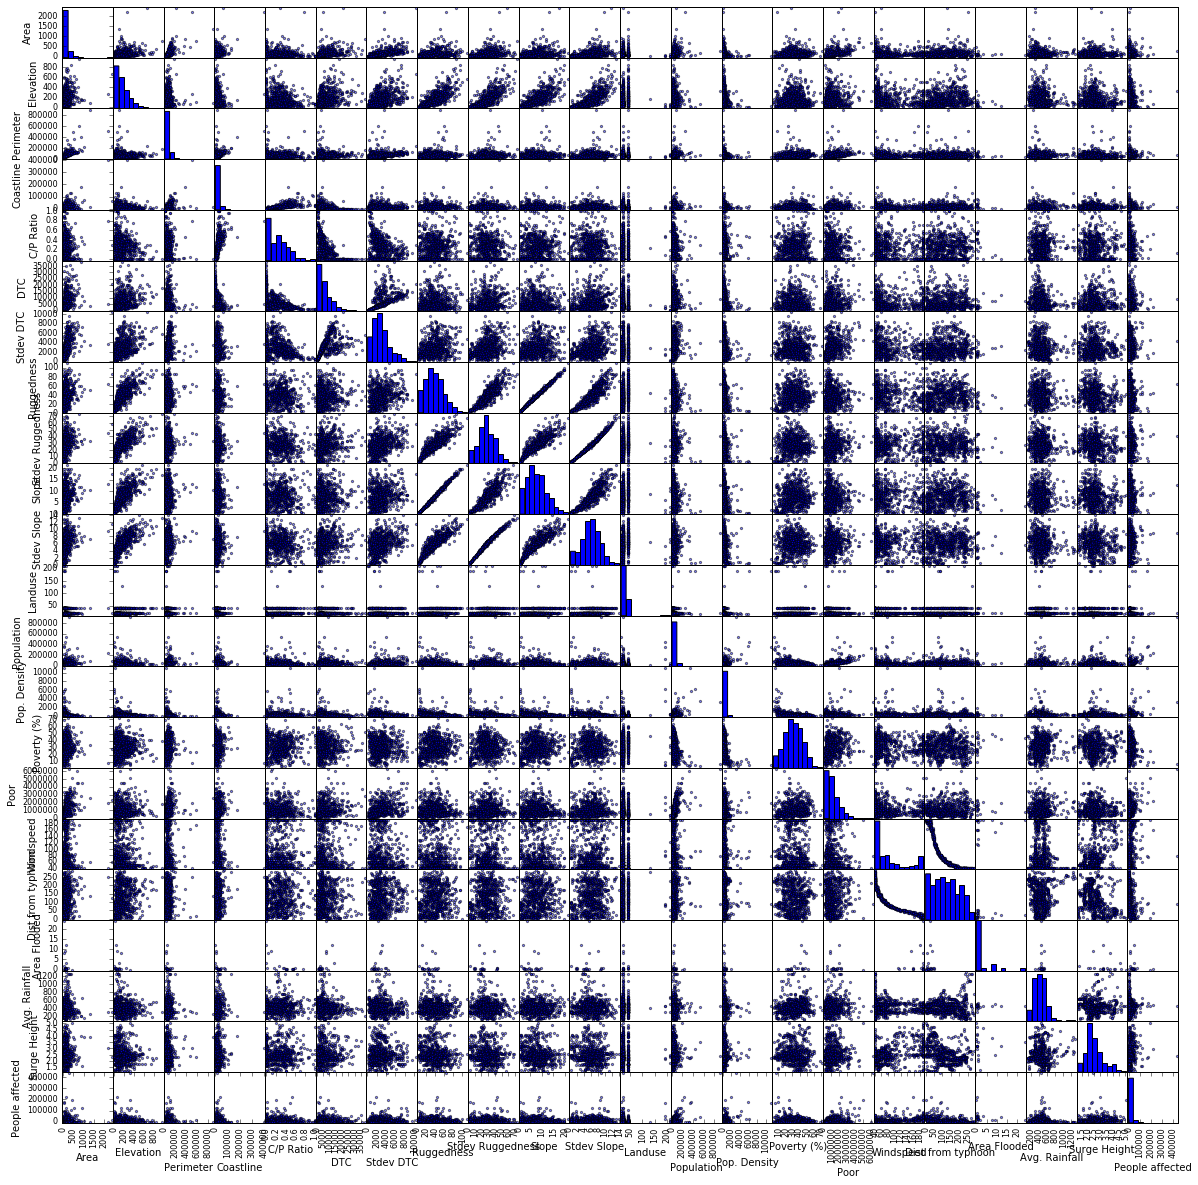

In [10]:
subH.columns = [u'Area', u'Elevation', u'Perimeter',
       u'Coastline', u'C/P Ratio',
       u'DTC', u'Stdev DTC',
       u'Ruggedness', u'Stdev Ruggedness',
       u'Slope', u'Stdev Slope', u'Landuse', u'Population',
       u'Pop. Density', u'Poverty (%)', 'Poor', u'Windspeed',
       u'Dist from typhoon', u'Area Flooded',
       u'Avg. Rainfall', u'Surge Height', u'Surge risk', 
        u'People affected']
scatter_matrix(subH, figsize=(20,20))

# Prediction

#### Missing values

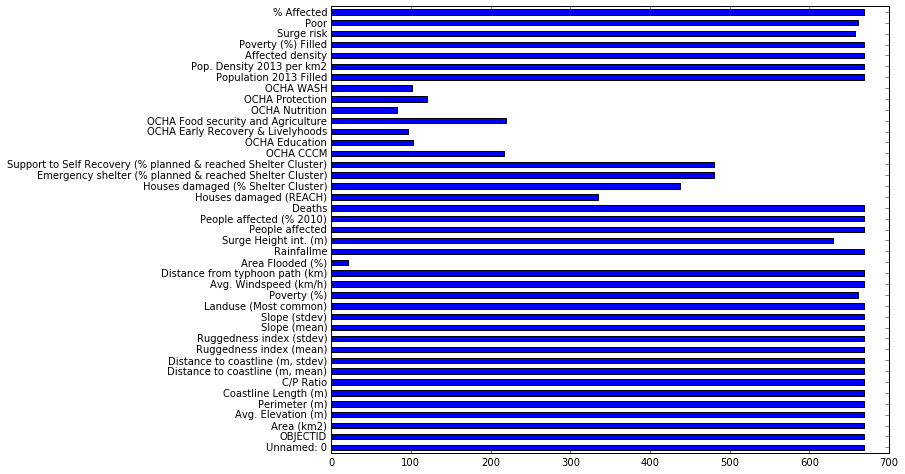

In [11]:
H[pd.notnull(H['People affected'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,8))

#### Parameters selection, droping na

## 1. All parameters

In [13]:
H = H[[ u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)', 
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk', u'People affected']]



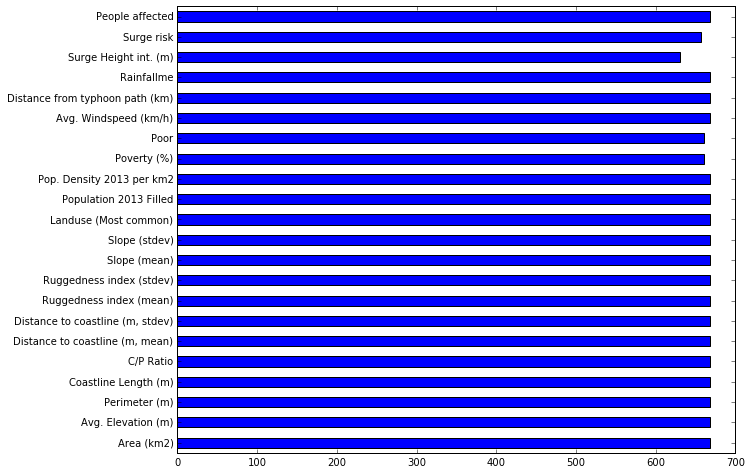

In [14]:
H[pd.notnull(H['People affected'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,8))

In [15]:
H = H.dropna()

In [16]:
X = H[[  u'Area (km2)', u'Avg. Elevation (m)', u'Perimeter (m)',
       u'Coastline Length (m)', u'C/P Ratio',
       u'Distance to coastline (m, mean)', u'Distance to coastline (m, stdev)',
       u'Ruggedness index (mean)', u'Ruggedness index (stdev)',
       u'Slope (mean)', u'Slope (stdev)', u'Landuse (Most common)',
       u'Population 2013 Filled',
       u'Pop. Density 2013 per km2', u'Poverty (%)', 'Poor', u'Avg. Windspeed (km/h)',
       u'Distance from typhoon path (km)',
       u'Rainfallme', u'Surge Height int. (m)', u'Surge risk'
      ]]
y = np.ravel(H[[u'People affected']])

In [17]:
print H.shape
print X.shape
print y.shape

(613, 22)
(613, 21)
(613,)


### Random Forest Regressor

In [18]:
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X, y)
print CV_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 50, 'min_samples_leaf': 5}


In [19]:
rf = RandomForestRegressor(max_features= 'sqrt', n_estimators= 50, min_samples_leaf= 10)
predicted_rf = cross_validation.cross_val_predict(rf, X, y, cv=10)



#### Accuracy 

In [20]:
print 'MAE: ', mean_absolute_error(y, predicted_rf)
print 'R2: ', r2_score(y, predicted_rf)

MAE:  12523.0974669
R2:  0.257959349684


### Gradient Boosting Regressor


In [23]:
gb = GradientBoostingRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [10, 20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [2, 5, 10, 20]
}
CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 10)
CV_gb.fit(X, y)
print CV_gb.best_params_

{'max_features': 'log2', 'n_estimators': 20, 'min_samples_leaf': 2}


In [24]:
gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 20, min_samples_leaf= 2)
predicted_gb = cross_validation.cross_val_predict(gb, X, y, cv=10)
# prediction can be negative

predicted_gb = [max(0,x) for x in predicted_gb]

print 'MAE: ', mean_absolute_error(y, predicted_gb)
print 'R2: ', r2_score(y, predicted_gb)


MAE:  13039.9933378
R2:  0.263958673575


## 2. Select parameters


In [25]:
m = ExtraTreesRegressor()
m = m.fit(X, y)
zipped =  zip(m.feature_importances_, X.columns)
c = [str(a) + ' ' + b for (a, b) in zipped]
print sort(c)[::-1]
         

['0.283692652539 Population 2013 Filled' '0.228493088941 Poor'
 '0.0845181790784 Avg. Windspeed (km/h)'
 '0.0634033201931 Distance from typhoon path (km)'
 '0.0617390802275 Pop. Density 2013 per km2'
 '0.0355845048159 Ruggedness index (mean)'
 '0.0307633318165 Ruggedness index (stdev)' '0.0272808624502 Perimeter (m)'
 '0.022370071305 Rainfallme' '0.0216120620514 Avg. Elevation (m)'
 '0.0188974972956 Slope (mean)' '0.017096417574 Landuse (Most common)'
 '0.0166689960728 Surge Height int. (m)'
 '0.0135041336686 Distance to coastline (m, stdev)'
 '0.0120086413527 Coastline Length (m)' '0.0115946947361 Poverty (%)'
 '0.0114222189881 Area (km2)' '0.0111896756795 C/P Ratio'
 '0.00996348920182 Surge risk'
 '0.009838540142 Distance to coastline (m, mean)'
 '0.0083585418715 Slope (stdev)']


#### Select features with importance > 0.02


In [26]:
selected = [b for (a,b) in zipped if a > 0.02]
print selected

['Avg. Elevation (m)', 'Perimeter (m)', 'Ruggedness index (mean)', 'Ruggedness index (stdev)', 'Population 2013 Filled', 'Pop. Density 2013 per km2', 'Poor', 'Avg. Windspeed (km/h)', 'Distance from typhoon path (km)', 'Rainfallme']


In [27]:
X2 = H[[ 'Avg. Elevation (m)', 'Perimeter (m)', 'Ruggedness index (mean)', 'Ruggedness index (stdev)', 'Population 2013 Filled', 'Pop. Density 2013 per km2', 'Poor', 'Avg. Windspeed (km/h)', 'Distance from typhoon path (km)', 'Rainfallme']]
y = np.ravel(H[[u'People affected']])

### Random Forest

In [28]:
rf = RandomForestRegressor(n_estimators=200)
param_grid = { 
    'n_estimators': [ 50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [ 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X2, y)
print CV_rf.best_params_

{'max_features': 'log2', 'n_estimators': 100, 'min_samples_leaf': 5}


In [29]:
rf = RandomForestRegressor(max_features= 'log2', n_estimators=100, min_samples_leaf= 5)
predicted_rf = cross_validation.cross_val_predict(rf, X2, y, cv=10)

print 'MAE: ', mean_absolute_error(y, predicted_rf)
print 'R2: ', r2_score(y, predicted_rf)


MAE:  11656.8910986
R2:  0.316838421133


### Gradient Boosting Regressor

In [30]:
gb = GradientBoostingRegressor(max_features= 'log2', n_estimators= 100, min_samples_leaf= 5)

param_grid = { 
    'n_estimators': [ 50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'], 
    'min_samples_leaf': [ 5, 10, 20]
}
CV_rf = GridSearchCV(estimator=gb, param_grid=param_grid, cv= 10)
CV_rf.fit(X2, y)
print CV_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 50, 'min_samples_leaf': 5}


In [31]:
gb = GradientBoostingRegressor(max_features= 'sqrt', n_estimators= 50, min_samples_leaf= 5)
predicted_gb = cross_validation.cross_val_predict(gb, X2, y, cv=10)
# prediction can be negative

predicted_gb = [max(0,x) for x in predicted_gb]

print 'MAE: ', mean_absolute_error(y, predicted_gb)
print 'R2: ', r2_score(y, predicted_gb)

MAE:  11973.796333
R2:  0.318352685557


In [32]:
outcome = pd.DataFrame({'People affected': y, 'PredictedGB': predicted_gb, 'PredictedRF': predicted_rf})
errors = pd.DataFrame()
errors['errors'] = (outcome['People affected'] - outcome.PredictedGB).apply(lambda x: np.abs(x))
print "Quantile 80%: ", errors.quantile(0.80).errors
print "Quantile 90%: ", errors.quantile(0.90).errors



Quantile 80%:  14485.6119904
Quantile 90%:  21886.581789


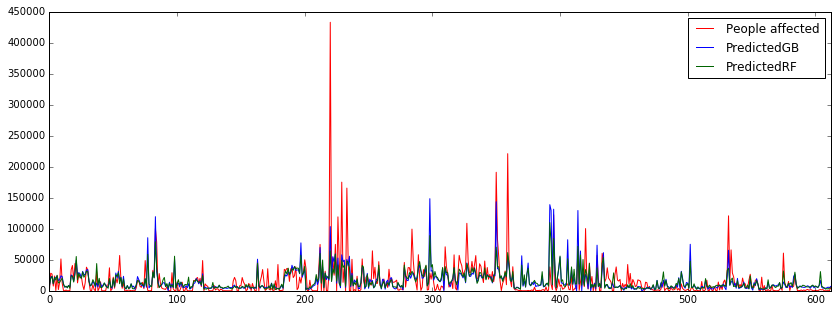

In [33]:
outcome.plot(figsize=(14, 5), color=['red', 'blue', 'darkgreen'])

In [68]:
outcome.describe()

,Houses damaged (REACH),Predicted
count,323.000000,323.000000
mean,1773.585139,1756.111332
std,2933.024286,2302.691009
min,1.000000,9.659549
25%,25.000000,74.607170
50%,233.000000,732.854584
75%,2515.500000,2656.583606
max,15824.000000,9702.296020


### Export the best prediction results

In [34]:
prediction = pd.DataFrame()
prediction['Predicted People Affected'] =  predicted_gb
prediction.index = X.index
prediction.to_csv("./data/Predicted poeple affected.csv")